In [28]:
import matplotlib.pyplot as plt
import pandas as pd
from path import Path
import numpy as np 
import seaborn as sns
from statistics import mean
from pandas.plotting import scatter_matrix


#from sklearn import preprocessingrom sklearn.preprocessing import LabelEncoder,OneHotEncoder 
#from sklearn.preprocessing import StandardScaler
#rom sklearn.model_selection import train_test_split


In [3]:
# Load data
file_path=Path("chocolate.csv")
chocolate_df = pd.read_csv(file_path)

chocolate_df.head()

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN


In [4]:
chocolate_df.shape

(2224, 21)

In [5]:
chocolate_df.drop(columns=chocolate_df.columns[0], axis=1, inplace=True)
chocolate_df.head()

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN


In [6]:
chocolate_df.drop(["ref",  "specific_bean_origin_or_bar_name", "beans","first_taste","second_taste", "third_taste", "fourth_taste"], axis=1, inplace=True)
chocolate_df

,company,company_location,review_date,country_of_bean_origin,cocoa_percent,rating,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar
0,5150,U.S.A,2019,Madagascar,76.0,3.75,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
1,5150,U.S.A,2019,Dominican republic,76.0,3.50,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
2,5150,U.S.A,2019,Tanzania,76.0,3.25,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
3,A. Morin,France,2012,Peru,63.0,3.75,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
4,A. Morin,France,2012,Bolivia,70.0,3.50,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,Zotter,Austria,2014,Blend,80.0,2.75,4,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar
2220,Zotter,Austria,2017,Colombia,75.0,3.75,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
2221,Zotter,Austria,2018,Belize,72.0,3.50,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
2222,Zotter,Austria,2018,Congo,70.0,3.25,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar


In [7]:
chocolate_df.describe()

,review_date,cocoa_percent,rating,counts_of_ingredients
count,2224.000000,2224.000000,2224.000000,2224.000000
mean,2013.857914,71.493930,3.198561,3.075989
std,3.582151,5.278253,0.434329,0.929875
min,2006.000000,42.000000,1.000000,1.000000
25%,2011.000000,70.000000,3.000000,2.000000
50%,2014.000000,70.000000,3.250000,3.000000
75%,2016.000000,74.000000,3.500000,4.000000
max,2020.000000,100.000000,4.000000,6.000000


In [9]:
chocolate_df.dtypes

company                     object
company_location            object
review_date                  int64
country_of_bean_origin      object
cocoa_percent              float64
rating                     float64
counts_of_ingredients        int64
cocoa_butter                object
vanilla                     object
lecithin                    object
salt                        object
sugar                       object
sweetener_without_sugar     object
dtype: object

In [10]:
chocolate_df.isna().sum()

company                    0
company_location           0
review_date                0
country_of_bean_origin     0
cocoa_percent              0
rating                     0
counts_of_ingredients      0
cocoa_butter               0
vanilla                    0
lecithin                   0
salt                       0
sugar                      0
sweetener_without_sugar    0
dtype: int64

In [11]:
chocolate_df.nunique()

company                    502
company_location            66
review_date                 15
country_of_bean_origin      62
cocoa_percent               46
rating                      13
counts_of_ingredients        6
cocoa_butter                 2
vanilla                      2
lecithin                     2
salt                         2
sugar                        2
sweetener_without_sugar      2
dtype: int64

In [12]:
uniqueValues=chocolate_df['company_location'].unique()
print(uniqueValues)

['U.S.A' 'France' 'Fiji' 'Vanuatu' 'Ecuador' 'Mexico' 'Switzerland'
 'Netherlands' 'Spain' 'Peru' 'Canada' 'Italy' 'Brazil' 'Nicaragua' 'U.k.'
 'Australia' 'Philippines' 'Wales' 'Belgium' 'Vietnam' 'Germany'
 'Singapore' 'Venezuela' 'Malaysia' 'Russia' 'South korea' 'Taiwan'
 'Puerto rico' 'Colombia' 'Japan' 'New zealand' 'Costa rica' 'Hungary'
 'Scotland' 'Martinique' 'Sao tome' 'St. lucia' 'Guatemala' 'South africa'
 'Dominican republic' 'Sao tome & principe' 'Bolivia' 'Portugal' 'Norway'
 'Denmark' 'Grenada' 'Israel' 'India' 'St.vincent-grenadines'
 'Czech republic' 'Thailand' 'Finland' 'Madagascar' 'Sweden' 'Poland'
 'Austria' 'Honduras' 'U.a.e.' 'Lithuania' 'Ireland' 'Chile' 'Ghana'
 'Iceland' 'Argentina' 'Suriname' 'El salvador']


In [13]:
uniqueBeanOrigin=chocolate_df['country_of_bean_origin'].unique()
print(uniqueBeanOrigin)

['Madagascar' 'Dominican republic' 'Tanzania' 'Peru' 'Bolivia' 'Venezuela'
 'Ecuador' 'Brazil' 'Papua new guinea' 'Burma' 'Panama' 'Colombia' 'Cuba'
 'Togo' 'Sao tome' 'Mexico' 'Fiji' 'Vanuatu' 'Indonesia' 'Trinidad'
 'Vietnam' 'Nicaragua' 'Ghana' 'Belize' 'Blend' 'Grenada' 'Jamaica'
 'Guatemala' 'Costa rica' 'Honduras' 'Haiti' 'India' 'Congo' 'Philippines'
 'Solomon islands' 'Uganda' 'Malaysia' 'Sri lanka' 'Ivory coast' 'Gabon'
 'Taiwan' 'Puerto rico' 'Martinique' 'St. lucia' 'Australia' 'Liberia'
 'Sierra leone' 'Nigeria' 'U.s.a.' 'St.vincent-grenadines' 'Thailand'
 'Tobago' 'Bolvia' 'Sumatra' 'El salvador' 'Cameroon' 'Samoa'
 'Sao tome & principe' 'Principe' 'Sulawesi' 'Suriname' 'Dr congo']


In [14]:
print("Least liked chocolates: ")
chocolate_df[chocolate_df['rating'] == 1]

Least liked chocolates: 


,company,company_location,review_date,country_of_bean_origin,cocoa_percent,rating,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar
1479,Neuhaus (Callebaut),Belgium,2007,Blend,73.0,1.0,5,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar


In [15]:
#higher cocoa does not yield a higher rating
chocolate_df.sort_values(by="rating", ascending=False).head(20)

,company,company_location,review_date,country_of_bean_origin,cocoa_percent,rating,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar
1071,Idilio (Felchlin),Switzerland,2011,Venezuela,72.0,4.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
2104,Valrhona,France,2007,Madagascar,64.0,4.0,5,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
218,Benoit Nihant,Belgium,2011,Indonesia,72.0,4.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
112,Arete,U.S.A,2015,Nicaragua,70.0,4.0,2,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
220,Benoit Nihant,Belgium,2013,Ecuador,73.0,4.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
443,Castronovo,U.S.A,2016,Belize,72.0,4.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
706,Duffy's,U.k.,2015,Guatemala,70.0,4.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
711,Durci,U.S.A,2015,Ecuador,70.0,4.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
2114,Valrhona,France,2011,Venezuela,64.0,4.0,5,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
716,Durci,U.S.A,2018,Peru,70.0,4.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar


In [16]:
#higher cocoa does not yield a higher rating, but people actually rate them low
chocolate_df.sort_values(by="cocoa_percent", ascending=False).head(20)

,company,company_location,review_date,country_of_bean_origin,cocoa_percent,rating,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar
1059,Hotel Chocolat (Coppeneur),U.k.,2013,Ecuador,100.0,2.50,1,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_not_sugar,have_not_sweetener_without_sugar
1836,Sirene,Canada,2015,Madagascar,100.0,3.00,1,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_not_sugar,have_not_sweetener_without_sugar
1837,Sirene,Canada,2015,Ecuador,100.0,3.00,1,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_not_sugar,have_not_sweetener_without_sugar
1660,Pralus,France,2008,Madagascar,100.0,3.00,2,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_not_sugar,have_not_sweetener_without_sugar
1520,Ocho,New zealand,2016,Samoa,100.0,2.75,1,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_not_sugar,have_not_sweetener_without_sugar
400,C-Amaro,Italy,2013,Ecuador,100.0,3.50,1,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_not_sugar,have_not_sweetener_without_sugar
1395,Michel Cluizel,France,2006,Blend,99.0,2.00,4,have_cocoa_butter,have_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
962,Guittard,U.S.A,2009,Blend,91.0,3.00,5,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
396,Cacaoyere (Ecuatoriana),Ecuador,2008,Ecuador,91.0,1.50,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
2057,Theo,U.S.A,2007,Venezuela,91.0,2.00,2,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar


<AxesSubplot:xlabel='cocoa_percent', ylabel='rating'>

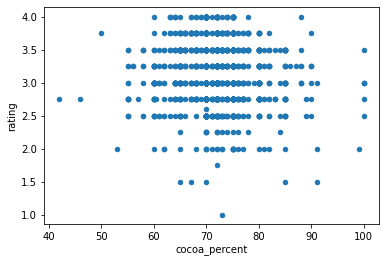

In [17]:
#the majority of ratings were between 2.5 and 3.5. No chocolate bar was rated higher than 4. 
chocolate_df.plot.scatter("cocoa_percent", "rating")

In [18]:
#Where do beans come from?

top_counts = chocolate_df.country_of_bean_origin.value_counts()
top_counts.head(10)



Venezuela             238
Peru                  207
Dominican republic    200
Ecuador               194
Madagascar            157
Blend                 140
Nicaragua              92
Brazil                 74
Bolivia                71
Belize                 65
Name: country_of_bean_origin, dtype: int64

In [19]:
#Who are the top producers?

top_producers=chocolate_df.company_location.value_counts()
top_producers.head(10)

U.S.A          948
France         167
Canada         158
U.k.           117
Italy           67
Belgium         56
Australia       51
Ecuador         50
Switzerland     43
Germany         39
Name: company_location, dtype: int64

In [20]:
#looks like the majority of higher rated bars contained 70-75% of cocoa 
pd.crosstab(chocolate_df["cocoa_percent"], chocolate_df['rating'])

rating,1.00,1.50,1.75,2.00,2.25,2.50,2.60,2.75,3.00,3.25,3.50,3.75,4.00
cocoa_percent,,,,,,,,,,,,,
42.0,0,0,0,0,0,0,0,1,0,0,0,0,0
46.0,0,0,0,0,0,0,0,1,0,0,0,0,0
50.0,0,0,0,0,0,0,0,0,0,0,0,1,0
53.0,0,0,0,1,0,0,0,0,0,0,0,0,0
55.0,0,0,0,0,0,3,0,6,2,2,2,0,0
56.0,0,0,0,0,0,0,0,0,0,2,0,0,0
57.0,0,0,0,0,0,0,0,1,0,0,0,0,0
58.0,0,0,0,0,0,2,0,0,1,2,3,0,0
60.0,0,0,0,1,0,5,0,7,17,9,3,1,1


In [21]:
#round the numbers in the ratings column
chocolate_df['rating']=chocolate_df['rating'].apply(lambda x: round(x,0))
chocolate_df.head()

,company,company_location,review_date,country_of_bean_origin,cocoa_percent,rating,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar
0,5150,U.S.A,2019,Madagascar,76.0,4.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
1,5150,U.S.A,2019,Dominican republic,76.0,4.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
2,5150,U.S.A,2019,Tanzania,76.0,3.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
3,A. Morin,France,2012,Peru,63.0,4.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
4,A. Morin,France,2012,Bolivia,70.0,4.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar


In [22]:
# Rated 3 and higher
topRated_df = chocolate_df[chocolate_df["rating"] >= 3]
topRated_df

,company,company_location,review_date,country_of_bean_origin,cocoa_percent,rating,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar
0,5150,U.S.A,2019,Madagascar,76.0,4.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
1,5150,U.S.A,2019,Dominican republic,76.0,4.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
2,5150,U.S.A,2019,Tanzania,76.0,3.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
3,A. Morin,France,2012,Peru,63.0,4.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
4,A. Morin,France,2012,Bolivia,70.0,4.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,Zotter,Austria,2014,Blend,80.0,3.0,4,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar
2220,Zotter,Austria,2017,Colombia,75.0,4.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
2221,Zotter,Austria,2018,Belize,72.0,4.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
2222,Zotter,Austria,2018,Congo,70.0,3.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar


In [23]:
#All countries that produced chocolate bars rated higher than 3. 
top_rated_producers=topRated_df.company_location.value_counts()
top_rated_producers.head(10)

U.S.A          850
France         153
Canada         153
U.k.           103
Italy           62
Belgium         52
Australia       48
Ecuador         41
Switzerland     41
Germany         37
Name: company_location, dtype: int64

In [24]:
# All countries with beans used in chocolate bars receiving rating higher than 3
top_rated_beans=topRated_df.country_of_bean_origin.value_counts()
top_rated_beans.head(15)

Venezuela             215
Dominican republic    186
Peru                  181
Ecuador               168
Madagascar            151
Blend                 117
Nicaragua              87
Brazil                 70
Belize                 64
Vietnam                64
Bolivia                63
Colombia               62
Tanzania               60
Guatemala              52
Papua new guinea       46
Name: country_of_bean_origin, dtype: int64

In [25]:
# Get average rating  for each country producer
rating_avg_producer = chocolate_df.groupby(["company_location"]).mean()["rating"].sort_values(ascending=False)
rating_avg_producer.head(10)

company_location
Argentina    4.000000
Chile        4.000000
Poland       3.714286
Sao tome     3.666667
Norway       3.666667
Vietnam      3.600000
Thailand     3.600000
Israel       3.555556
Iceland      3.500000
Finland      3.500000
Name: rating, dtype: float64

In [26]:
# Get average rating  for each country of bean origin
rating_avg_bean = chocolate_df.groupby(["country_of_bean_origin"]).mean()["rating"].sort_values(ascending=False)
rating_avg_bean.head(10)

country_of_bean_origin
Sao tome & principe    4.000000
Thailand               3.600000
Solomon islands        3.500000
Congo                  3.454545
Guatemala              3.433962
Cuba                   3.416667
Haiti                  3.416667
Madagascar             3.414013
Vietnam                3.406250
Papua new guinea       3.395833
Name: rating, dtype: float64

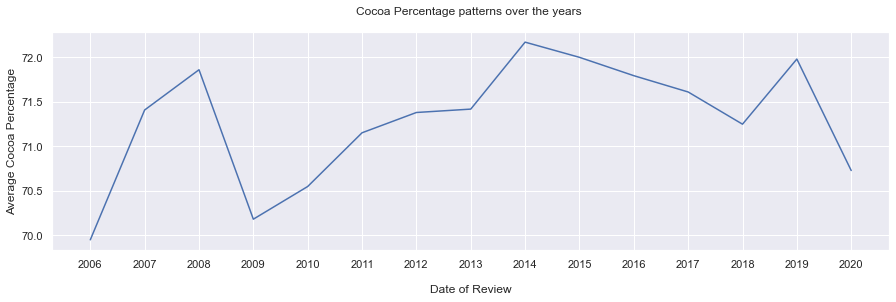

In [31]:
#How did the cocoa percent in chocolate bars change over the years?
choco = chocolate_df.groupby('review_date').aggregate({'cocoa_percent':'mean'})
choco = dcoco.reset_index()
# Plotting
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='review_date', y='cocoa_percent', data=dcoco)
ax.set(xticks=dcoco.review_date.values)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Cocoa Percentage")
plt.title("Cocoa Percentage patterns over the years \n")
plt.show()

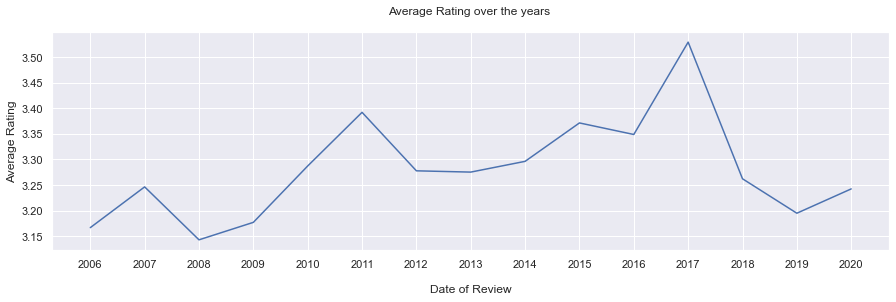

In [34]:
# Rating of chocolate bars over the years
choco_rate = chocolate_df.groupby('review_date').aggregate({'rating':'mean'})
choco_rate = choco_rate.reset_index()

# Plotting
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='review_date', y='rating', data=choco_rate)
ax.set(xticks=choco_rate.review_date.values)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Rating")
plt.title("Average Rating over the years \n")
plt.show()

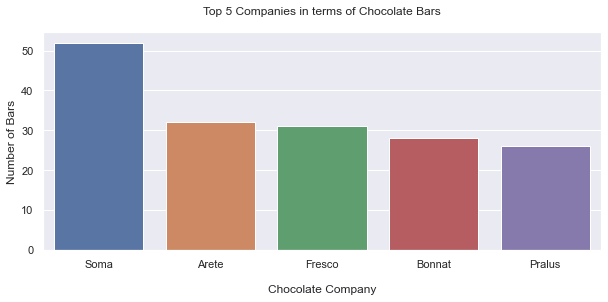

In [35]:
# Top 5 companies in terms of chocolate bars 
company = chocolate_df['company'].value_counts().sort_values(ascending=False).head(5)
company = pd.DataFrame(company)
company = company.reset_index() # dataframe with top 5 companies

# Plotting
sns.set()
plt.figure(figsize=(10,4))
sns.barplot(x='index', y='company', data=company)
plt.xlabel("\nChocolate Company")
plt.ylabel("Number of Bars")
plt.title("Top 5 Companies in terms of Chocolate Bars\n")
plt.show()

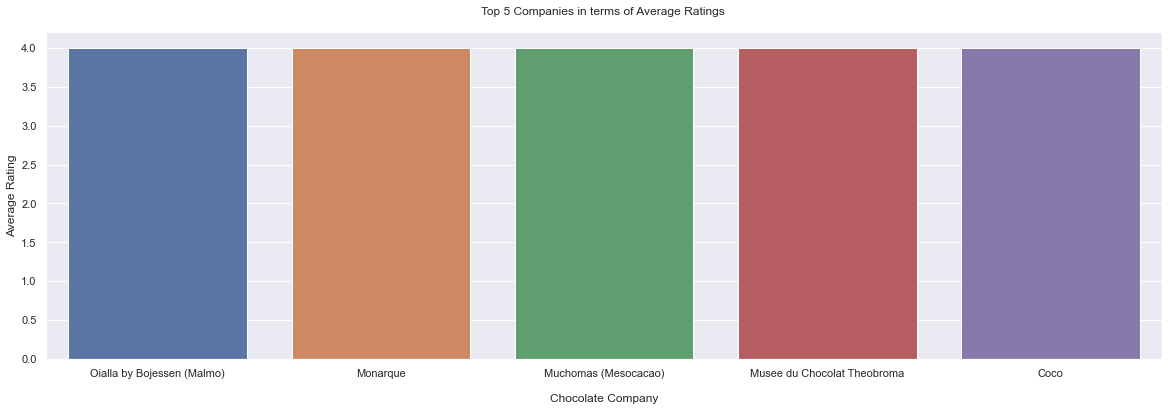

In [36]:
# Top 5 companies in terms of average ratings
ratings = chocolate_df.groupby('company').aggregate({'rating':'mean'})
ratings = ratings.sort_values('rating', ascending=False).head(5)
ratings = ratings.reset_index()

# Plotting
sns.set()
plt.figure(figsize=(20, 6))
sns.barplot(x='company', y='rating', data=ratings)
plt.xlabel("\nChocolate Company")
plt.ylabel("Average Rating")
plt.title("Top 5 Companies in terms of Average Ratings \n")
plt.show()

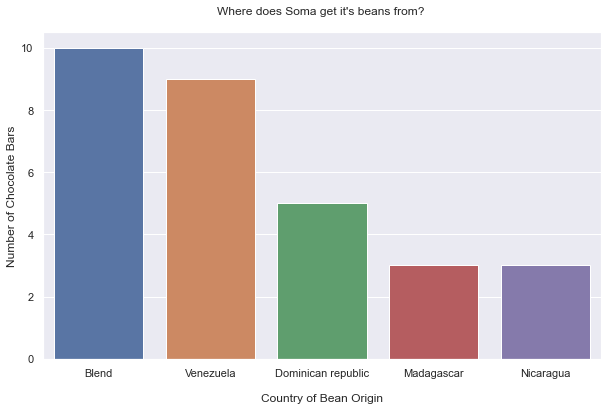

In [38]:
#Analysing the largest chocolate bar producer - Soma
soma = chocolate_df[chocolate_df['company']=='Soma']
origin = soma['country_of_bean_origin'].value_counts().sort_values(ascending=False).head(5)
origin = pd.DataFrame(origin)
origin = origin.reset_index()
# Plotting
sns.set()
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='country_of_bean_origin', data=origin)
plt.xlabel("\nCountry of Bean Origin")
plt.ylabel("Number of Chocolate Bars")
plt.title("Where does Soma get it's beans from? \n")
plt.show()

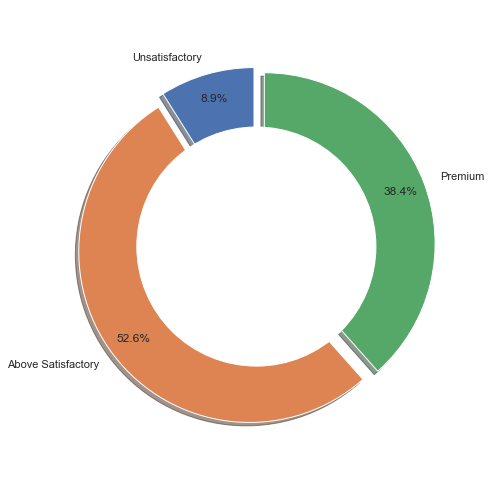

In [39]:
#Categorizing chocolate bars based on their rating
unsatisfactory = chocolate_df[chocolate_df['rating'] < 3.0]
satisfactory = chocolate_df[(chocolate_df['rating'] >= 3.0) & (chocolate_df.rating < 4)]
pre_elite = chocolate_df[chocolate_df['rating'] >= 4.0]
label_names=['Unsatisfactory','Above Satisfactory','Premium']
sizes = [unsatisfactory.shape[0],satisfactory.shape[0],pre_elite.shape[0]]

# Making the donut plot
explode = (0.05,0.05,0.05)
my_circle=plt.Circle((0,0),0.7,color='white')
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=label_names,explode=explode,autopct='%1.1f%%',pctdistance=0.85,startangle=90,shadow=True)
fig=plt.gcf()
fig.gca().add_artist(my_circle)
plt.axis('equal')
plt.tight_layout()
plt.show()

Rating: 3.0 Reviews: 1170
Rating: 4.0 Reviews: 855
Rating: 2.0 Reviews: 198
Rating: 1.0 Reviews: 1


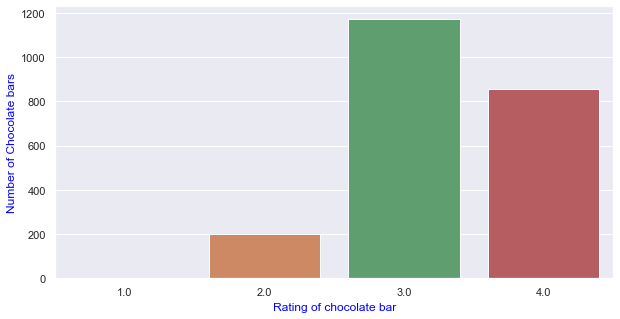

In [41]:
#count of chocolate ratings

counts=list(chocolate_df['rating'].value_counts())
rating=chocolate_df['rating'].value_counts().index.tolist()
rat=dict(zip(rating,counts))
for key,val in rat.items():
    print ('Rating:',key,'Reviews:',val)
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=chocolate_df)
plt.xlabel('Rating of chocolate bar',size=12,color='blue')
plt.ylabel('Number of Chocolate bars',size=12,color='blue')
plt.show()

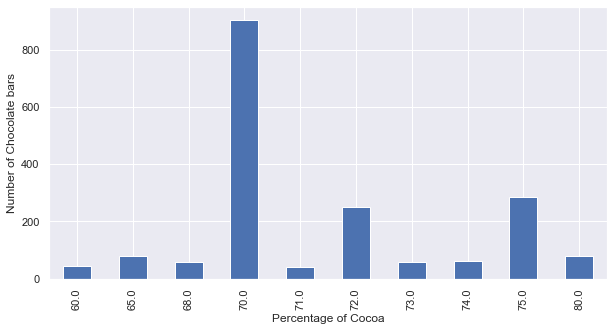

In [42]:
#Distribution of chocolate bars according to their cocoa percentage
plt.figure(figsize=(10,5))
chocolate_df['cocoa_percent'].value_counts().head(10).sort_index().plot.bar()
plt.xlabel('Percentage of Cocoa',size=12)
plt.ylabel('Number of Chocolate bars',size=12)
plt.show()

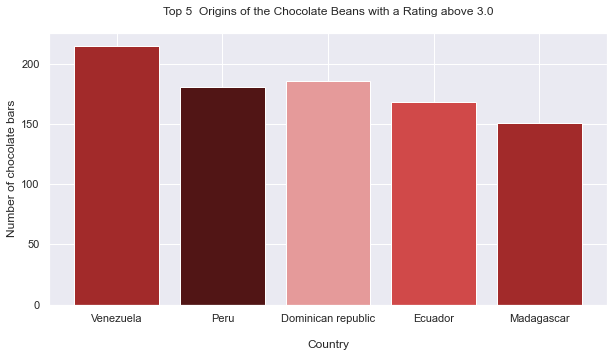

{'Venezuela': 215, 'Peru': 181, 'Dominican republic': 186, 'Ecuador': 168, 'Madagascar': 151}


In [44]:
#Where the best cocoa beans are grown (based on rating)
countries=chocolate_df['country_of_bean_origin'].value_counts().index.tolist()[:5]
satisfactory={} 
for j in countries:
    c=0
    b=chocolate_df[chocolate_df['country_of_bean_origin']==j]
    br=b[b['rating']>=3] 
    for i in br['rating']:
        c+=1
        satisfactory[j]=c    

# Code to visualize the countries that give best cocoa beans
li=satisfactory.keys()
plt.figure(figsize=(10,5))
plt.bar(range(len(satisfactory)), satisfactory.values(), align='center',color=['#a22a2a','#511515','#e59a9a','#d04949','#a22a2a'])
plt.xticks(range(len(satisfactory)), list(li))
plt.xlabel('\nCountry')
plt.ylabel('Number of chocolate bars')
plt.title("Top 5  Origins of the Chocolate Beans with a Rating above 3.0\n")
plt.show()

print(satisfactory)

Top Chocolate Producing Countries in the World

U.S.A     948
France    167
Canada    158
U.k.      117
Italy      67
Name: company_location, dtype: int64


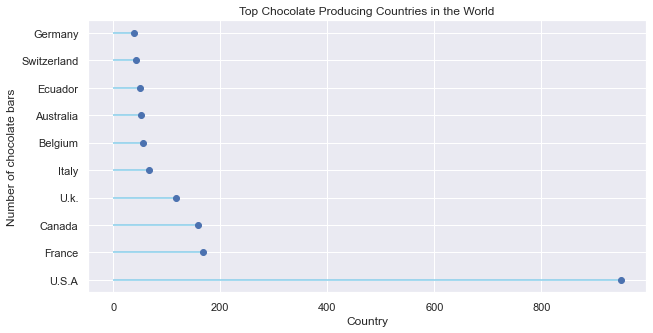

In [45]:
#the most chocolate bars produced
print ('Top Chocolate Producing Countries in the World\n')
country=list(chocolate_df['company_location'].value_counts().head(10).index)
choco_bars=list(chocolate_df['company_location'].value_counts().head(10))
prod_ctry=dict(zip(country,choco_bars))
print(chocolate_df['company_location'].value_counts().head())

plt.figure(figsize=(10,5))
plt.hlines(y=country,xmin=0,xmax=choco_bars,color='skyblue')
plt.plot(choco_bars,country,"o")
plt.xlabel('Country')
plt.ylabel('Number of chocolate bars')
plt.title("Top Chocolate Producing Countries in the World")
plt.show()

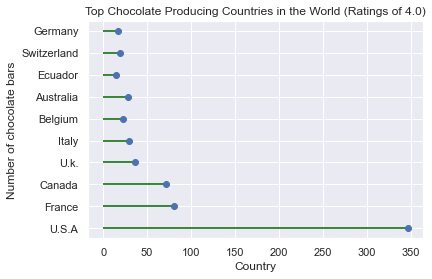

{'U.S.A': 346, 'France': 80, 'Canada': 71, 'U.k.': 36, 'Italy': 29, 'Belgium': 22, 'Australia': 28, 'Ecuador': 15, 'Switzerland': 19, 'Germany': 17}


In [47]:
#countries that produce best chocolates
countries=country
best_choc={}
for j in countries:
    c=0
    b=chocolate_df[chocolate_df['company_location']==j]
    br=b[b['rating']>=4] 
    for i in br['rating']:
        c+=1
        best_choc[j]=c    


li=best_choc.keys()


# The lollipop plot of best chocolates
plt.hlines(y=li,xmin=0,xmax=best_choc.values(),color='darkgreen')
plt.plot(best_choc.values(),li,"o")
plt.xlabel('Country')
plt.ylabel('Number of chocolate bars')
plt.title("Top Chocolate Producing Countries in the World (Ratings of 4.0)")
plt.show()
print(best_choc)

In [48]:
#get dummies for string characters
X = pd.get_dummies(chocolate_df, columns=['cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar','sweetener_without_sugar']).drop('rating', axis=1)

# Create target
y = chocolate_df['rating']
X.head(10)

,company,company_location,review_date,country_of_bean_origin,cocoa_percent,counts_of_ingredients,cocoa_butter_have_cocoa_butter,cocoa_butter_have_not_cocoa_butter,vanilla_have_not_vanila,vanilla_have_vanila,lecithin_have_lecithin,lecithin_have_not_lecithin,salt_have_not_salt,salt_have_salt,sugar_have_not_sugar,sugar_have_sugar,sweetener_without_sugar_have_not_sweetener_without_sugar,sweetener_without_sugar_have_sweetener_without_sugar
0,5150,U.S.A,2019,Madagascar,76.0,3,1,0,1,0,0,1,1,0,0,1,1,0
1,5150,U.S.A,2019,Dominican republic,76.0,3,1,0,1,0,0,1,1,0,0,1,1,0
2,5150,U.S.A,2019,Tanzania,76.0,3,1,0,1,0,0,1,1,0,0,1,1,0
3,A. Morin,France,2012,Peru,63.0,4,1,0,1,0,1,0,1,0,0,1,1,0
4,A. Morin,France,2012,Bolivia,70.0,4,1,0,1,0,1,0,1,0,0,1,1,0
5,A. Morin,France,2013,Venezuela,70.0,4,1,0,1,0,1,0,1,0,0,1,1,0
6,A. Morin,France,2013,Peru,63.0,3,1,0,1,0,0,1,1,0,0,1,1,0
7,A. Morin,France,2013,Ecuador,70.0,4,1,0,1,0,1,0,1,0,0,1,1,0
8,A. Morin,France,2013,Peru,70.0,4,1,0,1,0,1,0,1,0,0,1,1,0
9,A. Morin,France,2013,Brazil,70.0,4,1,0,1,0,1,0,1,0,0,1,1,0


In [49]:
#convert partially cleaned file to csv, ratings rounded
chocolate_df.to_csv('chocolate_version2.csv', index=False)

In [ ]:
#scale down the Cocoa Percent, since the values are so much bigger than any other column

#sc = StandardScaler()

#sc.fit(X_train['cocoa_percent'].values.reshape(-1, 1))

#X_train['cocoa_percent'] = sc.transform(X_train['cocoa_percent'].values.reshape(-1, 1))
#X_test['cocoa_percent'] = sc.transform(X_test['cocoa_percent'].values.reshape(-1, 1))

#X_train.head()